<a href="https://colab.research.google.com/github/sidwat/ERAlearning/blob/master/armourplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import files


In [28]:
uploaded=files.upload()


Saving robot2.jpg to robot2 (2).jpg


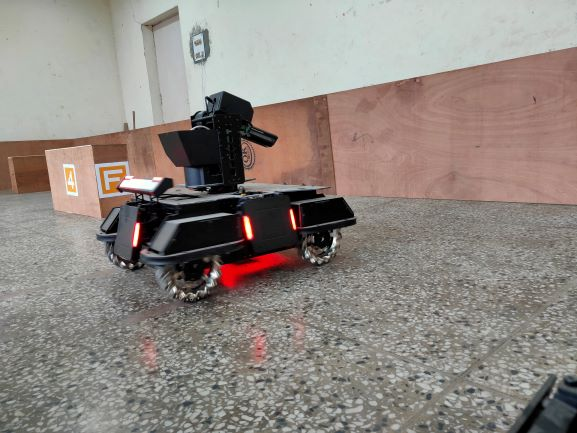

In [29]:
image=cv2.imread('robot2.jpg')
cv2_imshow(image)

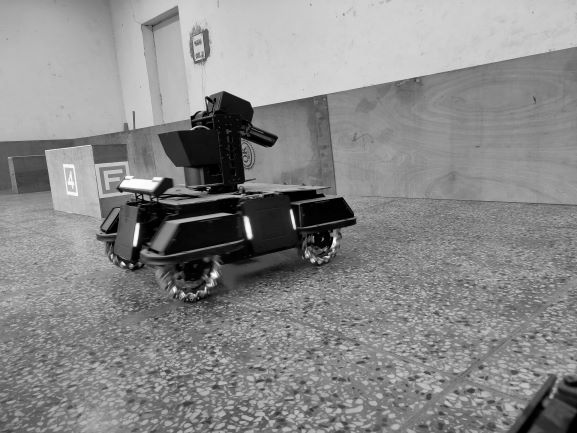

In [30]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
cv2_imshow(gray)


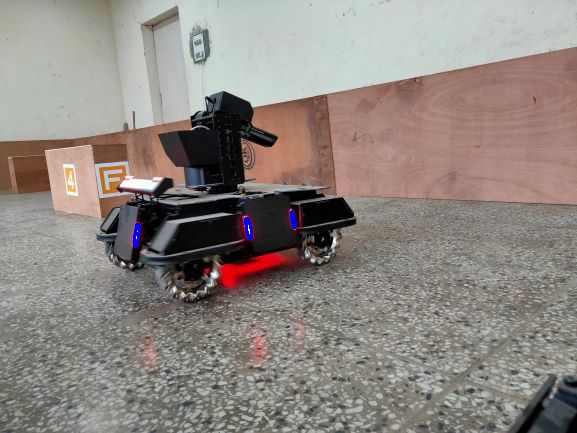

In [31]:
ret,thresh=cv2.threshold(gray,220,255,cv2.THRESH_BINARY)
kernal=np.ones((2,2))
thresh1=cv2.erode(thresh,kernal)
thresh2=cv2.dilate(thresh,kernal)
contours,_=cv2.findContours(thresh2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
count=0
for contour in contours:
  area=cv2.contourArea(contour)
  if area>=50 and area<=80:
    cv2.drawContours(image,contours,count,(255,0,0),2)
  count+=1
cv2.drawContours(image,contours,12,(255,0,0),2)
cv2_imshow(image)

after examining the area of the contours it was found that three of the contours of area 32.0,71.0,76.0 indexed as 12,10,11 indicate the indicators of the armour plate. So we need to draw the rectangle around these armour plates.

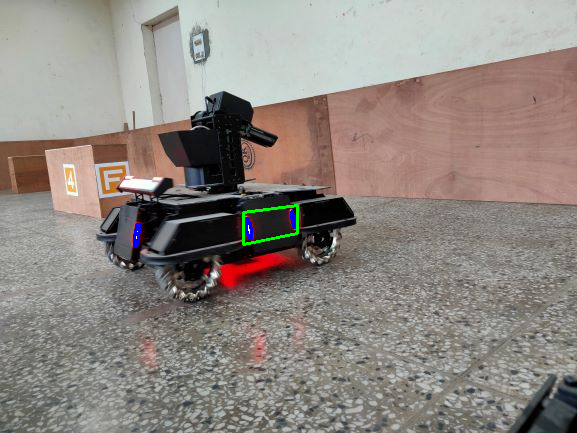

In [32]:
ptslist=[]
xval=[]
yval=[]
for i in contours[11]:
  xval.append(i[0][0])
  yval.append(i[0][1])
meanx=int(sum(xval)/len(xval))
ptslist+=[[meanx-5,max(yval)+6],[meanx-5,min(yval)-6]]
xval=[]
yval=[]
for i in contours[12]:
  xval.append(i[0][0])
  yval.append(i[0][1])
meanx=int(sum(xval)/len(xval))
ptslist+=[[meanx+5,min(yval)-6],[meanx+5,max(yval)+6]]
pts=np.array(ptslist)
cv2.polylines(image,[pts],True,(0,255,0),2)
cv2_imshow(image)

the polygon drawn around the armour plate